### 중간에 손상된 이미지 확인하는 코드의 스레드 수, cpu에 맞게 바꿔야 함 + 
### 코드 맨 마지막쯤의 yaml 파일 경로도 확인하기
### 그리고 전체 실행 가능

### 데스크탑의 d드라이브의 232.recycle 데이터는 삭제되지 않은 데이터까지 포함돼 있는 것 같음

In [1]:
# 현재 위치로 HOME 변수 선언

import os

HOME = os.getcwd()
HOME

'c:\\Users\\yjkim\\yolo11'

In [2]:
# org 폴더를 만든 다음 train, valid, test 경로를 지정하고 폴더 만드는 함수를 만듦

org_path = os.path.join(HOME, 'org')

os.makedirs(org_path, exist_ok=True)

train_path = os.path.join(org_path, 'train')
valid_path = os.path.join(org_path, 'valid')
test_path = os.path.join(org_path, 'test')

def make_folder(path1, path2):
    new_path = os.path.join(path1, path2)
    os.makedirs(new_path, exist_ok=True)

In [3]:
# 리스트 2개에 경로들을 집어넣어서 for문을 돌려서 폴더 만드는 함수로 폴더를 생성

path_list = [train_path, valid_path, test_path]
i_and_l = ['images', 'labels']

for path in path_list:
    for i in i_and_l:
        make_folder(path, i)

In [4]:
# glob로 zip 파일 목록을 받아온 다음 압축을 풀고 zip 파일 삭제

import zipfile
from glob import glob

zips1 = glob(os.path.join(HOME, '232.recycle/01-1/Validation/01.source_data/*.zip'))
zips2 = glob(os.path.join(HOME, '232.recycle/01-1/Validation/02.labeling_data/*.zip'))

# for zip in zips1:
#     print(zip)
# for zip in zips2:
#     print(zip)

extract_to_path1 = os.path.join(HOME, '232.recycle/01-1/Validation/01.source_data')
extract_to_path2 = os.path.join(HOME, '232.recycle/01-1/Validation/02.labeling_data')

if zips1 != None and zips2 != None:
    for zip in zips1:
        basename = os.path.basename(zip)
        # print(basename)
        basename = basename.split('.')[0] + '.' + basename.split('.')[1] + '.' + basename.split('.')[2] + '.' + basename.split('.')[3]
        # print(basename)
        extract_to_path3 = os.path.join(extract_to_path1, basename)
        os.makedirs(extract_to_path3, exist_ok=True)
        with zipfile.ZipFile(zip, 'r') as zip_ref:
            zip_ref.extractall(extract_to_path3)
        if os.path.exists(zip):
            os.remove(zip)

    for zip in zips2:
        basename = os.path.basename(zip)
        # print(basename)
        basename = basename.split('.')[0] + '.' + basename.split('.')[1] + '.' + basename.split('.')[2] + '.' + basename.split('.')[3]
        # print(basename)
        extract_to_path4 = os.path.join(extract_to_path2, basename)
        os.makedirs(extract_to_path4, exist_ok=True)
        with zipfile.ZipFile(zip, 'r') as zip_ref:
            zip_ref.extractall(extract_to_path4)
        if os.path.exists(zip):
            os.remove(zip)

In [5]:
# 추가 다운로드한 파일을 zip 파일째로 경로에 맞게 복사하고 압축을 풀기

zips5 = glob(os.path.join(HOME, '232.recycle/01-1/Training/01.source_data/*.zip'))
zips6 = glob(os.path.join(HOME, '232.recycle/01-1/Training/02.labeling_data/*.zip'))

extract_to_path5 = os.path.join(HOME, '232.recycle/01-1/Training/01.source_data')
extract_to_path6 = os.path.join(HOME, '232.recycle/01-1/Training/02.labeling_data')

if zips5 != None:
    for zip in zips5:
        basename = os.path.basename(zip)
        # print(basename)
        basename = basename.split('.')[0] + '.' + basename.split('.')[1] + '.' + basename.split('.')[2] + '.' + basename.split('.')[3]
        # print(basename)
        extract_to_path7 = os.path.join(extract_to_path5, basename)
        os.makedirs(extract_to_path7, exist_ok=True)
        with zipfile.ZipFile(zip, 'r') as zip_ref:
            zip_ref.extractall(extract_to_path7)
        if os.path.exists(zip):
            os.remove(zip)

    for zip in zips6:
        basename = os.path.basename(zip)
        # print(basename)
        basename = basename.split('.')[0] + '.' + basename.split('.')[1] + '.' + basename.split('.')[2] + '.' + basename.split('.')[3]
        # print(basename)
        extract_to_path8 = os.path.join(extract_to_path6, basename)
        os.makedirs(extract_to_path8, exist_ok=True)
        with zipfile.ZipFile(zip, 'r') as zip_ref:
            zip_ref.extractall(extract_to_path8)
        if os.path.exists(zip):
            os.remove(zip)

In [6]:
# 추가 다운로드한 파일을 맞는 위치로 옮김

import shutil

image_brown_src = os.path.join(HOME, '232.recycle/01-1/Training/01.source_data/TS_2.직접촬영_07.유리병_001.갈색')
image_green_src = os.path.join(HOME, '232.recycle/01-1/Training/01.source_data/TS_2.직접촬영_07.유리병_002.녹색')

label_brown_src = os.path.join(HOME, '232.recycle/01-1/Training/02.labeling_data/TL_2.직접촬영_07.유리병_001.갈색')
label_green_src = os.path.join(HOME, '232.recycle/01-1/Training/02.labeling_data/TL_2.직접촬영_07.유리병_002.녹색')

image_brown_dst = os.path.join(HOME, '232.recycle/01-1/Validation/01.source_data/5_Glass_Bottle_Brown')
image_green_dst = os.path.join(HOME, '232.recycle/01-1/Validation/01.source_data/6_Glass_Bottle_Green')

label_brown_dst = os.path.join(HOME, '232.recycle/01-1/Validation/02.labeling_data/5_Glass_Bottle_Brown')
label_green_dst = os.path.join(HOME, '232.recycle/01-1/Validation/02.labeling_data/6_Glass_Bottle_Green')

image_brown_list = glob(os.path.join(image_brown_src, '**'))
image_green_list = glob(os.path.join(image_green_src, '**'))

label_brown_list = glob(os.path.join(label_brown_src, '**'))
label_green_list = glob(os.path.join(label_green_src, '**'))

def move_file(files, dst):
    for file in files:
        shutil.move(file, dst)
if image_brown_list:
    move_file(image_brown_list, image_brown_dst)
    move_file(image_green_list, image_green_dst)
    move_file(label_brown_list, label_brown_dst)
    move_file(label_green_list, label_green_dst)

In [7]:
# 파일 경로 재선언

extract_to_path1 = os.path.join(HOME, '232.recycle/01-1/Validation/01.source_data')
extract_to_path2 = os.path.join(HOME, '232.recycle/01-1/Validation/02.labeling_data')

In [8]:
# label json 파일들을 읽어서 바운딩 박스인 것만 클래스별로 리스트에 담음
# 약 50초 정도 걸림

import json

lns = []

for path in glob(os.path.join(extract_to_path2, '**')):
    all_labels = glob(os.path.join(path, '*.json'))
    all_labels_box = []
    for label in all_labels:
        # print(os.path.basename(label).split('.')[0])
        with open(label, 'r') as file:
            data = json.load(file)
            if data['ANNOTATION_INFO'][0]['SHAPE_TYPE'] == 'BOX':
                all_labels_box.append(label)
    lns.append(all_labels_box)

In [9]:
# label의 개수를 확인함

for i in lns:
    print(len(i))
# print(lns[0][0])

# None 뜨는 이미지들 삭제한 후
# 3259
# 4069
# 7352
# 4610
# 14994
# 10759 -> 10732
# 1844

3259
4069
7352
4610
14994
10734
1844


In [10]:
# 이번에는 이미지들을 모두 이중 리스트(클래스별로)로 담음

ins = []

for path in glob(os.path.join(extract_to_path1, '**')):
    all_images = glob(os.path.join(path, '*.jpg'))
    ins.append(all_images)

for i in ins:
    print(len(i))
# print(ins[0][0])

# None 뜨는 이미지들 삭제한 후
# 7016 -> 6996
# 4966 -> 4965
# 9104
# 7707
# 18910
# 18905 -> 18878
# 2141

6996
4965
9104
7707
18910
18880
2141


### 이미지 resize 하는데 중간에 몇 개 이미지가 None이 뜨는 것 같아서(손상된 파일?) 한글 경로를 영어로 수정하고 None 뜨는 이미지들 찾아본 다음 삭제함

In [11]:
import os
print(os.cpu_count())  # 논리적 코어 수 반환

16


In [12]:
# 손상된 이미지 확인하는 코드
# 시간이 너무 오래 걸려서 그냥 에러 없앤 이미지들, 파일 탐색기로 복사하기
# 데스크탑으로 14분 정도 걸림

import cv2
from concurrent.futures import ThreadPoolExecutor

def check_image(img):
    if cv2.imread(img) is None:
        return img  # 손상된 이미지 반환

def file_none_check(ins):
    error_image = []
    with ThreadPoolExecutor(max_workers=8) as executor:  # 스레드 수를 16개로 설정(노트북 기준, 데스크탑은 8)
        for i in ins:
            future_to_img = {executor.submit(check_image, img): img for img in i}
            for future in future_to_img:
                result = future.result()
                if result:
                    error_image.append(result)
    return error_image

# 함수 호출
error_image = file_none_check(ins)

In [14]:
print(len(error_image))

if error_image:
    print(error_image[0])

# 48
# c:\Users\YJKIM_PC\yolo11\232.recycle/01-1/Validation/01.source_data\1_Metal_Can_Steel_Can\280555@4_01001_김복선_P1_T1.jpg

0


In [15]:
import os

for img in error_image:
    if os.path.exists(img):
        os.remove(img)
        label = img.replace('01.source_data', '02.labeling_data').replace('.jpg', '.json')
    if os.path.exists(label):
        os.remove(label)

for img in error_image:
    if os.path.exists(img):
        print('아직 이미지가 존재합니다.')

In [16]:
# label json 파일들을 읽어서 바운딩 박스인 것만 클래스별로 리스트에 담음
# 약 50초 정도 걸림
# 2

import json

lns = []

for path in glob(os.path.join(extract_to_path2, '**')):
    all_labels = glob(os.path.join(path, '*.json'))
    all_labels_box = []
    for label in all_labels:
        # print(os.path.basename(label).split('.')[0])
        with open(label, 'r') as file:
            data = json.load(file)
            if data['ANNOTATION_INFO'][0]['SHAPE_TYPE'] == 'BOX':
                all_labels_box.append(label)
    lns.append(all_labels_box)

In [17]:
# label의 개수를 확인함

for i in lns:
    print(len(i))
# print(lns[0][0])

# None 뜨는 이미지들 삭제한 후
# 3259
# 4069
# 7352
# 4610
# 14994
# 10759 -> 10732
# 1844

3259
4069
7352
4610
14994
10734
1844


In [18]:
# 이번에는 이미지들을 모두 이중 리스트(클래스별로)로 담음

ins = []

for path in glob(os.path.join(extract_to_path1, '**')):
    all_images = glob(os.path.join(path, '*.jpg'))
    ins.append(all_images)

for i in ins:
    print(len(i))
# print(ins[0][0])

# None 뜨는 이미지들 삭제한 후
# 7016 -> 6996
# 4966 -> 4965
# 9104
# 7707
# 18910
# 18905 -> 18878
# 2141

6996
4965
9104
7707
18910
18880
2141


In [19]:
# 경로 다시 선언

image_train_dst = os.path.join(org_path, 'train', 'images')
label_train_dst = os.path.join(org_path, 'train', 'labels')

image_valid_dst = os.path.join(org_path, 'valid', 'images')
label_valid_dst = os.path.join(org_path, 'valid', 'labels')

image_test_dst = os.path.join(org_path, 'test', 'images')
label_test_dst = os.path.join(org_path, 'test', 'labels')

In [20]:
# random seed 값 고정

import random

random.seed(42)

In [21]:
# ord에 있는 파일들을 지우는 코드
# 약 30초 정도 걸림

import os
from glob import glob

def file_remove(path):
    if path:
        for file in path:
            os.remove(file)

file_remove(glob(os.path.join(image_train_dst, '*')))
file_remove(glob(os.path.join(label_train_dst, '*')))
file_remove(glob(os.path.join(image_valid_dst, '*')))
file_remove(glob(os.path.join(label_valid_dst, '*')))
file_remove(glob(os.path.join(image_test_dst, '*')))
file_remove(glob(os.path.join(label_test_dst, '*')))

print(len(glob(os.path.join(image_train_dst, '*'))))
print(len(glob(os.path.join(label_train_dst, '*'))))
print(len(glob(os.path.join(image_valid_dst, '*'))))
print(len(glob(os.path.join(label_valid_dst, '*'))))
print(len(glob(os.path.join(image_test_dst, '*'))))
print(len(glob(os.path.join(label_test_dst, '*'))))

0
0
0
0
0
0


In [22]:
# train:valid:test 폴더에 각각 6:2:2 비율로 1000:350:350장씩 복사하기 + 개수 확인
# 약 3분 정도 걸림

import shutil

def copy_file(files, dst):
    for file in files:
        shutil.copy(file, dst)

# match labels with images: mlwi
def mlwi(labels, images):
    image_dict = {os.path.splitext(os.path.basename(img))[0]: img for img in images}
    
    matched_images =    [
        image_dict.get(os.path.splitext(os.path.basename(label))[0]) 
        for label in labels 
        if os.path.splitext(os.path.basename(label))[0] in image_dict
    ]

    return matched_images

for i, l in enumerate(lns):
    selected_labels = random.sample(l, 1700)

    train_files = selected_labels[:1000]
    valid_files = selected_labels[1000:1350]
    test_files = selected_labels[1350:1700]

    copy_file(train_files, label_train_dst)
    copy_file(valid_files, label_valid_dst)
    copy_file(test_files, label_test_dst)

    images = ins[i]
    selected_images = mlwi(selected_labels, images)

    train_files = selected_images[:1000]
    valid_files = selected_images[1000:1350]
    test_files = selected_images[1350:1700]

    copy_file(train_files, image_train_dst)
    copy_file(valid_files, image_valid_dst)
    copy_file(test_files, image_test_dst)
    
print(len(glob(os.path.join(image_train_dst, '*'))))
print(len(glob(os.path.join(label_train_dst, '*'))))

print(len(glob(os.path.join(image_valid_dst, '*'))))
print(len(glob(os.path.join(label_valid_dst, '*'))))

print(len(glob(os.path.join(image_test_dst, '*'))))
print(len(glob(os.path.join(label_test_dst, '*'))))

7000
7000
2450
2450
2450
2450


In [23]:
# 이미지와 레이블명이 같은지 확인

train_image_list = glob(os.path.join(image_train_dst, '*'))
train_label_list = glob(os.path.join(label_train_dst, '*'))

valid_image_list = glob(os.path.join(image_valid_dst, '*'))
valid_label_list = glob(os.path.join(label_valid_dst, '*'))

test_image_list = glob(os.path.join(image_test_dst, '*'))
test_label_list = glob(os.path.join(label_test_dst, '*'))

def len_check(image_list, label_list):
    
    image_names = {os.path.splitext(os.path.basename(i))[0] for i in image_list}
    label_names = {os.path.splitext(os.path.basename(l))[0] for l in label_list}

    matched_names = image_names.intersection(label_names)
    
    return len(matched_names)

train_count = len_check(train_image_list, train_label_list)
valid_count = len_check(valid_image_list, valid_label_list)
test_count = len_check(test_image_list, test_label_list)

print(train_count)
print(valid_count)
print(test_count)

7000
2450
2450


In [24]:
# 필요한 라이브러리들 import

import cv2
import matplotlib.pyplot as plt

{'IMAGE_INFO': {'FILE_NAME': '10023@2_03001_220718_P1_T1.jpg', 'DATE': '2022-07-18 12:15:46', 'RESOLUTION': '4032 x 2268', 'IMAGE_PHOTOGRAPHER': '이승종', 'FOCUS_DISTANCE': None, 'EXPOSURE_TIME': None, 'SENSITIVITY_ISO': None, 'PLACE': '주택가분리수거장', 'REGION_NAME': None, 'Direction': '2', 'HEIGHT': None, 'DAY/NIGHT': '주간', 'WEATHER': '맑음', 'IMAGE_HEIGHT': 2268, 'IMAGE_WIDTH': 4032, 'IMAGE_SIZE': '3.6 MB'}, 'ANNOTATION_INFO': [{'ID': '1', 'CLASS': '페트병', 'DETAILS': '무색단일', 'DAMAGE': '완전압착', 'DIRTINESS': '오염없음', 'COVER': '없음', 'TRANSPARENCY': '투명', 'SHAPE': '물통형', 'SHAPE_TYPE': 'BOX', 'POINTS': [[685.6691568345324, 607.3155782353024, 2316.3534796311565, 664.6172044517548]]}]}
[685.6691568345324, 607.3155782353024, 2316.3534796311565, 664.6172044517548]
x_min: 685, y_min: 607, x_max: 3002, y_max: 1271
Image size: (2268, 4032, 3)


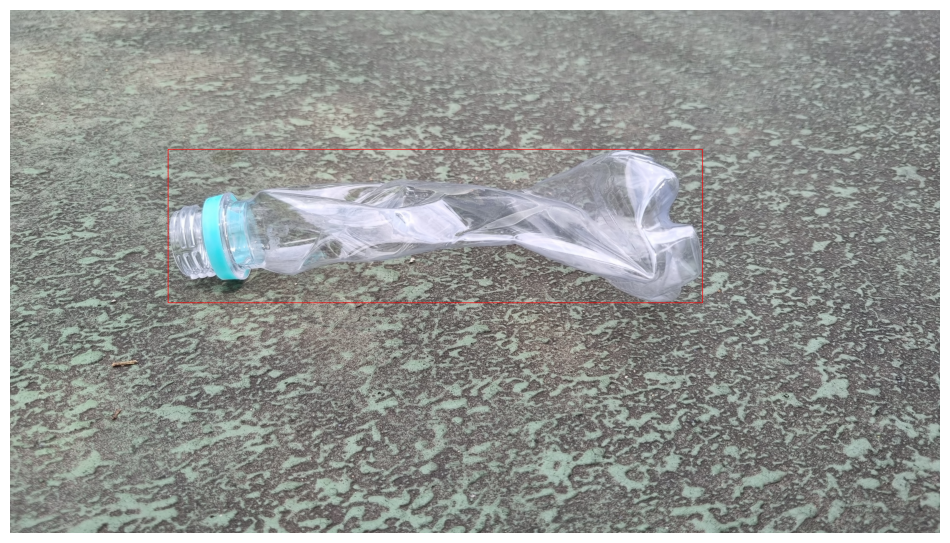

In [25]:
# 데이터 형식이 coco인지 yolo인지 확인하기
# 데이터 형식은 coco로 확인됨

import json

BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White

image = glob(os.path.join(image_train_dst, '*.jpg'))[0]
label = glob(os.path.join(label_train_dst, '*.json'))[0]
# image = "C:/Users/yjkim/yolo11/org/train/images/105744@5_03001_220802_P1_T1.jpg"
# label = "C:/Users/yjkim/yolo11/org/train/labels/105744@5_03001_220802_P1_T1.json"

with open(label, 'r') as file:
    data = json.load(file)

print(data)
print(data['ANNOTATION_INFO'][0]['POINTS'][0])

x_min, y_min, w, h = data['ANNOTATION_INFO'][0]['POINTS'][0]
x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)

img = cv2.imread(image)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(f"x_min: {x_min}, y_min: {y_min}, x_max: {x_max}, y_max: {y_max}")
print(f"Image size: {img.shape}")  # 이미지 크기 출력

cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=BOX_COLOR, thickness=2)
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img)

In [26]:
# coco 형식의 json 파일 가지고 yolo 형식의 txt 파일 만들기
# class와 details 이름이 다른 게 있어서 print문으로 확인하고 or로 처리해줌
# ANNOTATION_INFO가 2개인 경우 하나가 보통 0 값이 들어 있음. 따로 처리 해줌.

import json

def coco_to_yolo(label_json):
    _, file_extension = os.path.splitext(label_json) # _는 file_name
    if file_extension == '.json':
        with open(label_json, 'r') as file:
            data = json.load(file)

        image_width = data['IMAGE_INFO']['IMAGE_WIDTH']
        image_height = data['IMAGE_INFO']['IMAGE_HEIGHT']

        yolo_data = []
        if len(data['ANNOTATION_INFO']) == 1:
            for annotation in data['ANNOTATION_INFO']:
                # print(annotation['CLASS'], annotation['DETAILS'])
                # print(label_json)
                if annotation['CLASS'] == '금속캔':
                    if annotation['DETAILS'] == '철캔':
                        class_id = 0
                    elif annotation['DETAILS'] == '알루미늄캔':
                        class_id = 1
                elif annotation['CLASS'] == '페트병' or annotation['CLASS'] == '플라스틱':
                    if annotation['DETAILS'] == '무색단일' or annotation['DETAILS'] == 'PE':
                        class_id = 2
                    elif annotation['DETAILS'] == '유색단일' or annotation['DETAILS'] == 'PS':
                        class_id = 3
                elif annotation['CLASS'] == '유리병':
                    if annotation['DETAILS'] == '갈색':
                        class_id = 4
                    elif annotation['DETAILS'] == '녹색':
                        class_id = 5
                    elif annotation['DETAILS'] == '투명':
                        class_id = 6
        elif len(data['ANNOTATION_INFO']) == 2:
            for annotation in data['ANNOTATION_INFO']:
                if annotation['ID'] == '2':
                    # print(annotation['CLASS'], annotation['DETAILS'])
                    # print(label_json)
                    if annotation['CLASS'] == '금속캔':
                        if annotation['DETAILS'] == '철캔':
                            class_id = 0
                        elif annotation['DETAILS'] == '알루미늄캔':
                            class_id = 1
                    elif annotation['CLASS'] == '페트병' or annotation['CLASS'] == '플라스틱':
                        if annotation['DETAILS'] == '무색단일' or annotation['DETAILS'] == 'PE':
                            class_id = 2
                        elif annotation['DETAILS'] == '유색단일' or annotation['DETAILS'] == 'PS':
                            class_id = 3
                    elif annotation['CLASS'] == '유리병':
                        if annotation['DETAILS'] == '갈색':
                            class_id = 4
                        elif annotation['DETAILS'] == '녹색':
                            class_id = 5
                        elif annotation['DETAILS'] == '투명':
                            class_id = 6
            
        x_min, y_min, width, height = annotation['POINTS'][0]

        x_center = (x_min + width / 2) / image_width
        y_center = (y_min + height / 2) / image_height
        width_normalized = width / image_width
        height_normalized = height / image_height

        yolo_data.append(f'{class_id} {x_center} {y_center} {width_normalized} {height_normalized}')

        output_txt = label_json.replace('.json', '.txt')
        with open(output_txt, 'w') as f:
            for line in yolo_data:
                f.write(line + '\n')

In [27]:
# yolo 형식으로 바꾸는 함수 적용
# 약 40초 정도 걸림

import os
from glob import glob

org_path = os.path.join(HOME, 'org')

label_train_dst = os.path.join(org_path, 'train', 'labels')
label_valid_dst = os.path.join(org_path, 'valid', 'labels')
label_test_dst = os.path.join(org_path, 'test', 'labels')

train_label = glob(os.path.join(label_train_dst, '*'))
valid_label = glob(os.path.join(label_valid_dst, '*'))
test_label = glob(os.path.join(label_test_dst, '*'))

for label in train_label:
    coco_to_yolo(label)
for label in valid_label:
    coco_to_yolo(label)
for label in test_label:
    coco_to_yolo(label)

In [28]:
# 이미지와 레이블명이 같은지 확인

train_image_list = glob(os.path.join(image_train_dst, '*.jpg'))
train_label_list = glob(os.path.join(label_train_dst, '*.txt'))

valid_image_list = glob(os.path.join(image_valid_dst, '*.jpg'))
valid_label_list = glob(os.path.join(label_valid_dst, '*.txt'))

test_image_list = glob(os.path.join(image_test_dst, '*.jpg'))
test_label_list = glob(os.path.join(label_test_dst, '*.txt'))

def len_check(image_list, label_list):
    
    image_names = {os.path.splitext(os.path.basename(i))[0] for i in image_list}
    label_names = {os.path.splitext(os.path.basename(l))[0] for l in label_list}

    matched_names = image_names.intersection(label_names)
    
    return len(matched_names)

train_count = len_check(train_image_list, train_label_list)
valid_count = len_check(valid_image_list, valid_label_list)
test_count = len_check(test_image_list, test_label_list)

print(train_count)
print(valid_count)
print(test_count)

7000
2450
2450


In [29]:
# 증강한 데이터를 담을 폴더 만들기 (폴더명 aug)

aug_path = os.path.join(HOME, 'aug')

os.makedirs(aug_path, exist_ok=True)

train_path = os.path.join(aug_path, 'train')

def make_folder(path1, path2):
    new_path = os.path.join(path1, path2)
    os.makedirs(new_path, exist_ok=True)

i_and_l = ['images', 'labels']

for i in i_and_l:
    make_folder(train_path, i)

In [30]:
# 필요한 라이브러리 import

import albumentations as A
import matplotlib.pyplot as plt

In [31]:
# albumentaions resize(LongestMaxSize)

transform_resize = A.Compose(
    [A.LongestMaxSize(max_size=800, interpolation=cv2.INTER_LINEAR)],
    bbox_params = A.BboxParams(format='yolo', label_fields=['category_ids'])
)

In [32]:
# albumentaions hflip(LongestMaxSize)

transform_hflip = A.Compose(
    [A.HorizontalFlip(p=1.0)],
    bbox_params = A.BboxParams(format='yolo', label_fields=['category_ids'])
)

In [33]:
# albumentaions HueSaturationValue

transform_hsv = A.HueSaturationValue(
    hue_shift_limit = (-5, 5),
    sat_shift_limit = (20, 20),
    val_shift_limit = (30, 30),
    p = 0.7
)

In [34]:
# albumentaions ShiftScaleRotate(shift)

transform_shift = A.Compose(
    [A.ShiftScaleRotate(shift_limit=(-0.2, 0.2), scale_limit=(0, 0), rotate_limit=(0, 0), p=1.0)],
    bbox_params = A.BboxParams(format='yolo', min_area=1024, min_visibility=0.2, label_fields=['category_ids'])
)

In [35]:
# albumentaions ShiftScaleRotate(scale)

transform_scale = A.Compose(
    [A.ShiftScaleRotate(shift_limit=(0, 0), scale_limit=(-0.2, 0.2), rotate_limit=(0, 0), p=1.0)],
    bbox_params = A.BboxParams(format='yolo', min_area=1024, min_visibility=0.2, label_fields=['category_ids'])
)

In [36]:
# 시각화 함수들과 txt 파일을 읽고 쓰는 함수 작성

BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White
TEXT_COLOR = (0, 0, 0) # Black
# 검정색이 더 잘 보이는 것 같아서 변경함

def visualize_bbox(img, bbox, class_name, width, height, dataType='yolo', color=BOX_COLOR, thickness=2):
    if dataType == 'coco':
        x_min, y_min, w, h = bbox
        x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    elif dataType == 'yolo':
        x_center, y_center, w, h = bbox
        # 정규화된 값 0~1사이의 값
        # 픽셀 좌표로 변환 이미지의 width와 height값을 곱해주면 된다.
        x_min = int((x_center - (w/2))*width)
        x_max = int((x_center + (w/2))*width)
        y_min = int((y_center - (h/2))*height)
        y_max = int((y_center + (h/2))*height)
    print(x_min, x_max, y_min,y_max)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35,
        color=TEXT_COLOR,
        lineType=cv2.LINE_AA
    )

    return img

def visualize(image, bboxes, category_ids, category_id_to_name, img_width, img_height):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name, img_width, img_height, 'yolo')
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

def read_label_txt(txtFile):
    category_ids = []
    bboxes = []

    f = open(txtFile, 'r')
    while True:
        line = f.readline()
        if not line: break
        ids, xc, yc, w, h = line.split()
        category_ids.append(int(ids))
        bboxes.append([float(xc), float(yc), float(w), float(h)])
    f.close()

    return category_ids, bboxes

def write_label_txt(txtFile, category_ids, bboxes):
    f = open(txtFile, 'w')
    for i, ids in enumerate(category_ids):
        xc, yc, w, h = bboxes[i]
        
        f.write(f'{int(ids)} {xc} {yc} {w} {h}\n')
    f.close()

In [37]:
# 카테고리 인덱스 지정

# category_id_to_name = {0: '금속캔_철캔', 
#                     1: '금속캔_알루미늄캔', 
#                     2: '페트병_무색단일', 
#                     3: '페트병_유색단일', 
#                     4: '유리병_갈색', 
#                     5: '유리병_녹색', 
#                     6: '유리병_투명'}

# 한글이 깨져서 영어로 변경했음

category_id_to_name = {
    0: 'Metal_Can_Steel_Can', 
    1: 'Metal_Can_Aluminum_Can', 
    2: 'PET_Bottle_Clear_Single', 
    3: 'PET_Bottle_Colored_Single', 
    4: 'Glass_Bottle_Brown', 
    5: 'Glass_Bottle_Green', 
    6: 'Glass_Bottle_Clear'
}

In [38]:
# 데이터 증강 함수 작성(hsv 증강을 적용하는 확률은 0.7이므로 증강 안 된 나머지 30%(똑같은 이미지)를 저장하지 않게 하는 로직 추가)
# 그 때문에 정확히 7000장의 4배인 28000장이 아님(처음에는 28000장으로 서로 같은 이미지들도 같이 들어가 있었음)

import numpy as np

DEBUG = False

def dataAug(func, imagefiles):
    for imagefile in imagefiles:
        image = cv2.imread(imagefile)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        img_height, img_width = image.shape[0:2]
        
        basename = imagefile.split('.')[0]
        # basename_aug = imagefile.split('.')[0].replace('org', 'aug')
        basename_label = imagefile.split('.')[0].replace('images', 'labels')
        txtFile = basename_label + '.txt'
        category_ids, bboxes = read_label_txt(txtFile)

        print(imagefile)

        if func == 'resize':
            transformed = transform_resize(image=image, bboxes=bboxes, category_ids=category_ids)
            saveImageName = basename + '.jpg'
            saveLabelName = basename_label + '.txt'
            saveImage = cv2.cvtColor(transformed['image'], cv2.COLOR_RGB2BGR)
            cv2.imwrite(saveImageName, saveImage)
            write_label_txt(saveLabelName, transformed['category_ids'], transformed['bboxes'])
        elif func == 'hflip':
            transformed = transform_hflip(image=image, bboxes=bboxes, category_ids=category_ids)
            saveImageName = basename + '_hflip.jpg'
            saveLabelName = basename_label + '_hflip.txt'
            saveImage = cv2.cvtColor(transformed['image'], cv2.COLOR_RGB2BGR)
            cv2.imwrite(saveImageName, saveImage)
            write_label_txt(saveLabelName, transformed['category_ids'], transformed['bboxes'])
        elif func == 'rotate':
            angle_inter = 180
            for angle in range(angle_inter, 360, angle_inter):
                transform_rotate = A.Compose(
                    [A.Rotate(limit=(angle, angle), rotate_method='ellipse', p=1.0)],
                    bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids'])
                )
                transformed = transform_rotate(image=image, bboxes=bboxes, category_ids=category_ids)
                saveImageName = basename + f'_rotate_{angle}.jpg'
                saveLabelName = basename_label + f'_rotate_{angle}.txt'
                saveImage = cv2.cvtColor(transformed['image'], cv2.COLOR_RGB2BGR)
                cv2.imwrite(saveImageName, saveImage)
                write_label_txt(saveLabelName, transformed['category_ids'], transformed['bboxes'])
        elif func == 'hsv':
            transformed = transform_hsv(image=image, bboxes=bboxes, category_ids=category_ids)
            saveImageName = basename + '_hsv.jpg'
            saveLabelName = basename_label + '_hsv.txt'
            if not np.array_equal(image, transformed['image']):
                saveImage = cv2.cvtColor(transformed['image'], cv2.COLOR_RGB2BGR)
                cv2.imwrite(saveImageName, saveImage)
                write_label_txt(saveLabelName, transformed['category_ids'], transformed['bboxes'])
        elif func == 'shift':
            transformed = transform_shift(image=image, bboxes=bboxes, category_ids=category_ids)
            saveImageName = basename + '_shift.jpg'
            saveLabelName = basename_label + '_shift.txt'
            saveImage = cv2.cvtColor(transformed['image'], cv2.COLOR_RGB2BGR)
            cv2.imwrite(saveImageName, saveImage)
            write_label_txt(saveLabelName, transformed['category_ids'], transformed['bboxes'])
        elif func == 'scale':
            transformed = transform_scale(image=image, bboxes=bboxes, category_ids=category_ids)
            saveImageName = basename + '_scale.jpg'
            saveLabelName = basename_label + '_scale.txt'
            saveImage = cv2.cvtColor(transformed['image'], cv2.COLOR_RGB2BGR)
            cv2.imwrite(saveImageName, saveImage)
            write_label_txt(saveLabelName, transformed['category_ids'], transformed['bboxes'])

        if DEBUG == True:
            visualize(
                transformed['image'],
                transformed['bboxes'],
                transformed['category_ids'],
                category_id_to_name,
                img_width, img_height
            )
            break

In [39]:
# 원본 이미지를 리스트로 만들기

from glob import glob

image_train_org = os.path.join(org_path, 'train', 'images')
label_train_org = os.path.join(org_path, 'train', 'labels')

imagefiles_org = glob(os.path.join(image_train_org, '*.jpg'))
labelfiles_org = glob(os.path.join(label_train_org, '*.txt'))

print(len(imagefiles_org), len(labelfiles_org))

7000 7000


### resize 함수 실행 중에 지원되지 않는 파일 형식 때문에 에러가 한번 나서 random seed 값을 42에서 0으로 변경해서 다시 실행시킴
### 다시 실행시켰는데 이번에는 바운딩 박스 좌표가 2개고 그 중 하나에 0이 들어있어서 에러가 남
### json 파일을 txt 파일로 변환시켜주는 함수에서 추가 처리함

In [40]:
# 증강 적용, resize
# 약 9분 30초 정도 걸림

dataAug('resize', imagefiles_org)

c:\Users\yjkim\yolo11\org\train\images\10023@2_03001_220718_P1_T1.jpg
c:\Users\yjkim\yolo11\org\train\images\10035@1_03001_220722_P1_T1.jpg
c:\Users\yjkim\yolo11\org\train\images\100386@2_01001_220809_P1_T1.jpg
c:\Users\yjkim\yolo11\org\train\images\100411@5_01001_220809_P1_T1.jpg
c:\Users\yjkim\yolo11\org\train\images\100481@2_01001_220809_P1_T1.jpg
c:\Users\yjkim\yolo11\org\train\images\100498@4_01001_220809_P1_T1.jpg
c:\Users\yjkim\yolo11\org\train\images\10057@3_03001_220722_P1_T1.jpg
c:\Users\yjkim\yolo11\org\train\images\100613@4_01002_220809_P1_T1.jpg
c:\Users\yjkim\yolo11\org\train\images\1009796@3_03002_221020_P1_T1.jpg
c:\Users\yjkim\yolo11\org\train\images\1009844@4_03002_221020_P1_T1.jpg
c:\Users\yjkim\yolo11\org\train\images\1010043@5_03002_221020_P1_T1.jpg
c:\Users\yjkim\yolo11\org\train\images\1010088@4_03002_221020_P1_T1.jpg
c:\Users\yjkim\yolo11\org\train\images\1010161@5_03002_221020_P1_T1.jpg
c:\Users\yjkim\yolo11\org\train\images\1010173@4_03002_221020_P1_T1.jpg
c:\

In [41]:
# org 폴더의 train 이미지와 label들도 aug에 복사해서 train 되게 하기

from glob import glob
import shutil

image_train_org = os.path.join(org_path, 'train', 'images')
label_train_org = os.path.join(org_path, 'train', 'labels')

imagefiles_org = glob(os.path.join(image_train_org, '*.jpg'))
labelfiles_org = glob(os.path.join(label_train_org, '*.txt'))

image_train_aug = os.path.join(aug_path, 'train', 'images')
label_train_aug = os.path.join(aug_path, 'train', 'labels')

for image in imagefiles_org:
    shutil.copy(image, image_train_aug)
for label in labelfiles_org:
    shutil.copy(label, label_train_aug)

In [42]:
# 증강 이미지를 리스트로 만들기

import os
from glob import glob

aug_path = os.path.join(HOME, 'aug')

image_train_aug = os.path.join(aug_path, 'train', 'images')
label_train_aug = os.path.join(aug_path, 'train', 'labels')

imagefiles_aug = glob(os.path.join(image_train_aug, '*.jpg'))
labelfiles_aug = glob(os.path.join(label_train_aug, '*.txt'))

print(len(imagefiles_aug), len(labelfiles_aug))

7000 7000


In [43]:
# 증강용 데이터 폴더로 변경 테스트

# imagefiles[0].split('.')[0].replace('org', 'aug')

In [44]:
# 증강 적용, hflip
# 약 2분 30초 정도 걸림

# dataAug('hflip', imagefiles_aug)

In [45]:
# 증강 적용, rotate
# 약 30분 정도 걸림, 각도 20도 기준
# 약 분 정도 걸림, 각도 180도 기준

# dataAug('rotate', imagefiles_aug)

In [46]:
# 순차적으로 증강 적용, hsv, shift, scale
# 증강한 이미지 장수를 줄이기 위해 순차적으로 적용은 X
# 약 6분 30초 정도 걸림

# imagefiles_aug2 = glob(os.path.join(image_train_aug, '*.jpg'))
dataAug('hsv', imagefiles_aug)

# imagefiles_aug3 = glob(os.path.join(image_train_aug, '*.jpg'))
dataAug('shift', imagefiles_aug)

# imagefiles_aug4 = glob(os.path.join(image_train_aug, '*.jpg'))
dataAug('scale', imagefiles_aug)

c:\Users\yjkim\yolo11\aug\train\images\10023@2_03001_220718_P1_T1.jpg
c:\Users\yjkim\yolo11\aug\train\images\10035@1_03001_220722_P1_T1.jpg
c:\Users\yjkim\yolo11\aug\train\images\100386@2_01001_220809_P1_T1.jpg
c:\Users\yjkim\yolo11\aug\train\images\100411@5_01001_220809_P1_T1.jpg
c:\Users\yjkim\yolo11\aug\train\images\100481@2_01001_220809_P1_T1.jpg
c:\Users\yjkim\yolo11\aug\train\images\100498@4_01001_220809_P1_T1.jpg
c:\Users\yjkim\yolo11\aug\train\images\10057@3_03001_220722_P1_T1.jpg
c:\Users\yjkim\yolo11\aug\train\images\100613@4_01002_220809_P1_T1.jpg
c:\Users\yjkim\yolo11\aug\train\images\1009796@3_03002_221020_P1_T1.jpg
c:\Users\yjkim\yolo11\aug\train\images\1009844@4_03002_221020_P1_T1.jpg
c:\Users\yjkim\yolo11\aug\train\images\1010043@5_03002_221020_P1_T1.jpg
c:\Users\yjkim\yolo11\aug\train\images\1010088@4_03002_221020_P1_T1.jpg
c:\Users\yjkim\yolo11\aug\train\images\1010161@5_03002_221020_P1_T1.jpg
c:\Users\yjkim\yolo11\aug\train\images\1010173@4_03002_221020_P1_T1.jpg
c:\

In [47]:
# 모든 증강 이미지들과 레이블들 리스트로 만들기(개수 확인)

import os
from glob import glob

HOME = os.getcwd()

aug_path = os.path.join(HOME, 'aug')

image_train_aug = os.path.join(aug_path, 'train', 'images')
label_train_aug = os.path.join(aug_path, 'train', 'labels')

allImages = glob(os.path.join(image_train_aug, '*.jpg'))
allLabels = glob(os.path.join(label_train_aug, '*.txt'))

print(len(allImages))
print(len(allLabels))

25903
25903


In [49]:
# 데스크탑용 세팅
# 증강 전 resize만 한 데이터 학습, 모델: yolo11s

from ultralytics import YOLO

model = YOLO('yolo11s.pt')

results = model.train(data='C:/Users/yjkim/yolo11/data.yaml', epochs=100, imgsz=640, batch=16, patience=7)

New https://pypi.org/project/ultralytics/8.3.15 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.7  Python-3.10.15 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolo11s.pt, data=C:/Users/yjkim/yolo11/data.yaml, epochs=100, time=None, patience=7, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False,

train: Scanning C:\Users\yjkim\yolo11\org\train\labels... 7000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7000/7000 [00:02<00:00, 2929.42it/s]


train: New cache created: C:\Users\yjkim\yolo11\org\train\labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\yjkim\yolo11\org\valid\labels... 2450 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2450/2450 [02:01<00:00, 20.17it/s]

val: WARNING  C:\Users\yjkim\yolo11\org\valid\images\10042@1_03001_220722_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\yjkim\yolo11\org\valid\images\100459@5_01001_220809_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\yjkim\yolo11\org\valid\images\100475@4_01001_220809_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\yjkim\yolo11\org\valid\images\100515@1_03002_220809_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\yjkim\yolo11\org\valid\images\1010303@2_03002_221020_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\yjkim\yolo11\org\valid\images\1010316@4_03002_221020_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\yjkim\yolo11\org\valid\images\1010372@3_03002_221020_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\yjkim\yolo11\org\valid\images\1010775@1_03001_221020_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\yjkim\yolo11\org\valid\images\

val: New cache created: C:\Users\yjkim\yolo11\org\valid\labels.cache
Plotting labels to runs\detect\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.22G     0.4015      1.586     0.9294         16        640: 100%|██████████| 438/438 [01:26<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:23<00:00,  3.23it/s]

                   all       2450       2450      0.693      0.753      0.821      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.33G     0.4324     0.9052     0.9093         18        640: 100%|██████████| 438/438 [01:23<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:25<00:00,  3.00it/s]


                   all       2450       2450      0.643      0.628      0.665      0.617

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.31G     0.5242     0.9913     0.9515         19        640: 100%|██████████| 438/438 [01:20<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:28<00:00,  2.75it/s]

                   all       2450       2450      0.642       0.68      0.691      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.31G      0.588      1.077     0.9766         19        640: 100%|██████████| 438/438 [01:19<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:24<00:00,  3.19it/s]

                   all       2450       2450      0.621      0.572      0.587      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.31G     0.5639       1.01     0.9603         20        640: 100%|██████████| 438/438 [01:21<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:24<00:00,  3.10it/s]


                   all       2450       2450      0.734      0.734      0.816      0.755

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       4.3G     0.5279     0.9186     0.9483         17        640: 100%|██████████| 438/438 [01:19<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:22<00:00,  3.39it/s]

                   all       2450       2450      0.795      0.794      0.868      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.32G     0.5017     0.8614     0.9387         13        640: 100%|██████████| 438/438 [01:20<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:22<00:00,  3.37it/s]

                   all       2450       2450       0.81      0.794      0.873       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.31G     0.4794     0.8113     0.9291         18        640: 100%|██████████| 438/438 [01:21<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:23<00:00,  3.25it/s]


                   all       2450       2450      0.751      0.773      0.837      0.789

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.31G     0.4753       0.78     0.9234         13        640: 100%|██████████| 438/438 [01:21<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:24<00:00,  3.10it/s]

                   all       2450       2450      0.797      0.801      0.868      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       4.3G      0.454     0.7454     0.9192         17        640: 100%|██████████| 438/438 [01:20<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:23<00:00,  3.22it/s]

                   all       2450       2450      0.828      0.842      0.905      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.32G     0.4487     0.7216     0.9176         21        640: 100%|██████████| 438/438 [01:19<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:23<00:00,  3.28it/s]

                   all       2450       2450      0.855       0.86      0.909      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       4.3G       0.43     0.6884     0.9096         19        640: 100%|██████████| 438/438 [01:21<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:23<00:00,  3.26it/s]

                   all       2450       2450      0.834      0.829      0.901      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.32G     0.4233     0.6683     0.9038         20        640: 100%|██████████| 438/438 [01:18<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:23<00:00,  3.34it/s]

                   all       2450       2450      0.867      0.869      0.932      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.31G     0.4131     0.6432     0.8987         12        640: 100%|██████████| 438/438 [01:19<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:24<00:00,  3.18it/s]

                   all       2450       2450      0.851      0.859      0.922      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.31G     0.4076     0.6268      0.898         15        640: 100%|██████████| 438/438 [01:20<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:21<00:00,  3.52it/s]

                   all       2450       2450      0.866       0.88      0.931      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       4.3G     0.4016     0.6097     0.8941         20        640: 100%|██████████| 438/438 [01:16<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:21<00:00,  3.61it/s]

                   all       2450       2450      0.878      0.866      0.932      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.32G      0.393     0.5904     0.8932         23        640: 100%|██████████| 438/438 [01:16<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:21<00:00,  3.66it/s]

                   all       2450       2450      0.888      0.877      0.939      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.31G     0.3951     0.5757     0.8979         16        640: 100%|██████████| 438/438 [01:15<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:20<00:00,  3.67it/s]

                   all       2450       2450      0.886      0.894       0.95      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.32G     0.3876     0.5673     0.8883         14        640: 100%|██████████| 438/438 [01:16<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:21<00:00,  3.56it/s]

                   all       2450       2450      0.887      0.884      0.942      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       4.3G     0.3808     0.5519     0.8851         17        640: 100%|██████████| 438/438 [01:15<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:21<00:00,  3.62it/s]

                   all       2450       2450       0.88      0.864      0.929      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.31G     0.3731     0.5417     0.8842         21        640: 100%|██████████| 438/438 [01:16<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:21<00:00,  3.57it/s]

                   all       2450       2450      0.885      0.879      0.941       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       4.3G     0.3695     0.5259     0.8857         18        640: 100%|██████████| 438/438 [01:15<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:21<00:00,  3.57it/s]

                   all       2450       2450      0.903      0.881      0.947      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.32G     0.3714     0.5244     0.8862         17        640: 100%|██████████| 438/438 [01:15<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:21<00:00,  3.63it/s]

                   all       2450       2450      0.891       0.88      0.946      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.31G     0.3606     0.5058     0.8811         18        640: 100%|██████████| 438/438 [01:15<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:21<00:00,  3.65it/s]

                   all       2450       2450      0.896      0.897      0.945      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.31G     0.3618     0.5036     0.8824         15        640: 100%|██████████| 438/438 [01:15<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:21<00:00,  3.64it/s]

                   all       2450       2450      0.916       0.89      0.955       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       4.3G     0.3531     0.4873     0.8823         20        640: 100%|██████████| 438/438 [01:17<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:21<00:00,  3.51it/s]

                   all       2450       2450      0.916      0.906       0.96      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.32G     0.3538     0.4788     0.8805         27        640: 100%|██████████| 438/438 [01:18<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:21<00:00,  3.56it/s]

                   all       2450       2450        0.9      0.899      0.953      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.31G     0.3492      0.477     0.8776         18        640: 100%|██████████| 438/438 [01:18<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:22<00:00,  3.45it/s]

                   all       2450       2450      0.918      0.913      0.961      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.31G      0.353     0.4632     0.8791         16        640: 100%|██████████| 438/438 [01:20<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:21<00:00,  3.58it/s]

                   all       2450       2450      0.906      0.909      0.961      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.29G      0.345     0.4591     0.8772         17        640: 100%|██████████| 438/438 [01:19<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:22<00:00,  3.50it/s]

                   all       2450       2450      0.898      0.918      0.954       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.32G     0.3448     0.4629      0.878         18        640: 100%|██████████| 438/438 [01:19<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:23<00:00,  3.22it/s]

                   all       2450       2450      0.918      0.902      0.958      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.31G     0.3416     0.4436     0.8765         19        640: 100%|██████████| 438/438 [01:20<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:23<00:00,  3.28it/s]

                   all       2450       2450      0.918      0.919      0.964      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.31G     0.3404     0.4428     0.8741         25        640: 100%|██████████| 438/438 [01:19<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:22<00:00,  3.49it/s]

                   all       2450       2450      0.924      0.917      0.962      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       4.3G     0.3339     0.4209     0.8708         15        640: 100%|██████████| 438/438 [01:19<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:23<00:00,  3.30it/s]

                   all       2450       2450      0.927      0.904       0.96      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.32G     0.3338     0.4292     0.8727         26        640: 100%|██████████| 438/438 [01:19<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:22<00:00,  3.37it/s]

                   all       2450       2450       0.93      0.917      0.968      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.31G     0.3329     0.4203     0.8734         20        640: 100%|██████████| 438/438 [01:19<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:22<00:00,  3.38it/s]

                   all       2450       2450       0.93      0.914      0.961       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.31G     0.3282     0.4122     0.8719         21        640: 100%|██████████| 438/438 [01:19<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:23<00:00,  3.28it/s]

                   all       2450       2450       0.92      0.923      0.965      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       4.3G     0.3285     0.4064     0.8722         13        640: 100%|██████████| 438/438 [01:19<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:22<00:00,  3.40it/s]

                   all       2450       2450      0.931       0.92      0.967      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.32G     0.3269     0.3973     0.8722         18        640: 100%|██████████| 438/438 [01:19<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:22<00:00,  3.43it/s]

                   all       2450       2450      0.928      0.914      0.964      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.31G     0.3269     0.3958     0.8718         18        640: 100%|██████████| 438/438 [01:20<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:24<00:00,  3.17it/s]

                   all       2450       2450      0.929      0.922      0.968      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.31G     0.3254     0.3932     0.8683         17        640: 100%|██████████| 438/438 [01:23<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:24<00:00,  3.20it/s]

                   all       2450       2450      0.934      0.916      0.965      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       4.3G      0.322      0.389      0.869         21        640: 100%|██████████| 438/438 [01:19<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:22<00:00,  3.39it/s]

                   all       2450       2450      0.918      0.922      0.966      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.32G     0.3172     0.3823     0.8677         24        640: 100%|██████████| 438/438 [01:21<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:23<00:00,  3.22it/s]

                   all       2450       2450      0.922      0.921      0.964      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.31G     0.3176      0.373     0.8677         19        640: 100%|██████████| 438/438 [01:19<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:22<00:00,  3.37it/s]

                   all       2450       2450      0.923       0.92      0.963      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.32G     0.3117     0.3694     0.8672         19        640: 100%|██████████| 438/438 [01:19<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:21<00:00,  3.50it/s]

                   all       2450       2450      0.925      0.918      0.962      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       4.3G     0.3137     0.3621     0.8687         16        640: 100%|██████████| 438/438 [01:18<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:21<00:00,  3.61it/s]

                   all       2450       2450      0.936      0.924       0.97       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.31G     0.3056     0.3554     0.8655         23        640: 100%|██████████| 438/438 [01:17<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:21<00:00,  3.66it/s]

                   all       2450       2450      0.929      0.921      0.966      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.29G     0.3091     0.3596     0.8668         22        640: 100%|██████████| 438/438 [01:18<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:21<00:00,  3.54it/s]

                   all       2450       2450      0.933      0.932      0.969      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.32G     0.3016     0.3396     0.8642         21        640: 100%|██████████| 438/438 [01:18<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:21<00:00,  3.60it/s]

                   all       2450       2450      0.947      0.912      0.973      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.31G     0.3014     0.3413     0.8606         18        640: 100%|██████████| 438/438 [01:17<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:21<00:00,  3.63it/s]

                   all       2450       2450       0.93      0.935      0.971      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.31G     0.3005     0.3406     0.8626         19        640: 100%|██████████| 438/438 [01:20<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:21<00:00,  3.65it/s]

                   all       2450       2450      0.931      0.934      0.968      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.31G     0.2997     0.3374     0.8649         14        640: 100%|██████████| 438/438 [01:16<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:21<00:00,  3.62it/s]

                   all       2450       2450      0.942      0.929      0.973      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.32G     0.2959     0.3351     0.8602         25        640: 100%|██████████| 438/438 [01:15<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:20<00:00,  3.69it/s]

                   all       2450       2450      0.937       0.94      0.972      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.31G     0.2997     0.3247     0.8634         20        640: 100%|██████████| 438/438 [01:15<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:20<00:00,  3.72it/s]

                   all       2450       2450      0.936      0.935      0.971      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.31G     0.2963     0.3244     0.8619         20        640: 100%|██████████| 438/438 [01:15<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:20<00:00,  3.72it/s]

                   all       2450       2450      0.946      0.936      0.971      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100       4.3G     0.2975     0.3173     0.8634         19        640: 100%|██████████| 438/438 [01:15<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:21<00:00,  3.65it/s]

                   all       2450       2450      0.941      0.931      0.972      0.962
EarlyStopping: Training stopped early as no improvement observed in last 7 epochs. Best results observed at epoch 49, best model saved as best.pt.
To update EarlyStopping(patience=7) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



56 epochs completed in 1.608 hours.
Optimizer stripped from runs\detect\train3\weights\last.pt, 19.2MB
Optimizer stripped from runs\detect\train3\weights\best.pt, 19.2MB

Validating runs\detect\train3\weights\best.pt...
Ultralytics 8.3.7  Python-3.10.15 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 8188MiB)
YOLO11s summary (fused): 238 layers, 9,415,509 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:26<00:00,  2.91it/s]


                   all       2450       2450      0.946      0.911      0.973      0.963
   Metal_Can_Steel_Can        350        350      0.929      0.914      0.968      0.952
Metal_Can_Aluminum_Can        350        350      0.957      0.934      0.977      0.967
PET_Bottle_Clear_Single        350        350      0.963      0.898      0.973      0.961
PET_Bottle_Colored_Single        350        350      0.924      0.874      0.958      0.947
    Glass_Bottle_Brown        350        350      0.953        0.9       0.98      0.973
    Glass_Bottle_Green        350        350      0.942      0.923      0.979      0.973
    Glass_Bottle_Clear        350        350      0.956      0.934      0.976      0.969
Speed: 0.1ms preprocess, 1.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs\detect\train3


In [50]:
# 데스크탑용 세팅
# 증강한 데이터 학습, 모델: yolo11m
# 적용한 증강들: hsv(p=0.7), shift(p=1.0), scale(p=1.0)

from ultralytics import YOLO

model = YOLO('yolo11m.pt')

results = model.train(data='C:/Users/yjkim/yolo11/data_aug.yaml', epochs=150, imgsz=640, batch=16, patience=7)

New https://pypi.org/project/ultralytics/8.3.15 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.7  Python-3.10.15 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolo11m.pt, data=C:/Users/yjkim/yolo11/data_aug.yaml, epochs=150, time=None, patience=7, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fa

train: Scanning C:\Users\yjkim\yolo11\aug\train\labels... 25903 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25903/25903 [00:10<00:00, 2361.80it/s]


train: New cache created: C:\Users\yjkim\yolo11\aug\train\labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\yjkim\yolo11\org\valid\labels.cache... 2450 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2450/2450 [00:00<?, ?it/s]

val: WARNING  C:\Users\yjkim\yolo11\org\valid\images\10042@1_03001_220722_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\yjkim\yolo11\org\valid\images\100459@5_01001_220809_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\yjkim\yolo11\org\valid\images\100475@4_01001_220809_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\yjkim\yolo11\org\valid\images\100515@1_03002_220809_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\yjkim\yolo11\org\valid\images\1010303@2_03002_221020_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\yjkim\yolo11\org\valid\images\1010316@4_03002_221020_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\yjkim\yolo11\org\valid\images\1010372@3_03002_221020_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\yjkim\yolo11\org\valid\images\1010775@1_03001_221020_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\yjkim\yolo11\org\valid\images\

Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train4
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      8.43G     0.3456      1.057     0.9099         39        640: 100%|██████████| 1619/1619 [11:59<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:23<00:00,  3.21it/s]

                   all       2450       2450      0.795      0.834      0.893      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      8.55G     0.4124     0.7182     0.9326         37        640: 100%|██████████| 1619/1619 [14:17<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:28<00:00,  2.69it/s]

                   all       2450       2450      0.813      0.784      0.868      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150       8.5G     0.4921     0.8514     0.9687         33        640: 100%|██████████| 1619/1619 [13:09<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:26<00:00,  2.94it/s]

                   all       2450       2450      0.717      0.757      0.802      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      8.54G     0.4983     0.8611     0.9764         31        640: 100%|██████████| 1619/1619 [18:26<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:33<00:00,  2.32it/s]

                   all       2450       2450      0.766      0.786      0.826      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150       8.5G     0.4518     0.7452     0.9559         34        640: 100%|██████████| 1619/1619 [16:39<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [01:00<00:00,  1.28it/s]

                   all       2450       2450      0.863       0.83      0.914      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      8.52G     0.4181     0.6517     0.9399         38        640: 100%|██████████| 1619/1619 [16:12<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:34<00:00,  2.25it/s]

                   all       2450       2450       0.86      0.885      0.936      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      8.54G     0.3974     0.5993     0.9344         41        640: 100%|██████████| 1619/1619 [17:27<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:59<00:00,  1.30it/s]

                   all       2450       2450       0.87      0.857      0.929      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      8.54G     0.3824     0.5576     0.9268         26        640: 100%|██████████| 1619/1619 [18:27<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:46<00:00,  1.65it/s]

                   all       2450       2450      0.914      0.895      0.957      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150       8.5G     0.3736      0.529     0.9231         36        640: 100%|██████████| 1619/1619 [16:12<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:53<00:00,  1.44it/s]

                   all       2450       2450      0.919      0.896      0.957      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      8.52G     0.3624     0.5009     0.9164         26        640: 100%|██████████| 1619/1619 [17:18<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:34<00:00,  2.25it/s]

                   all       2450       2450      0.923      0.911      0.964       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      8.55G     0.3543     0.4729     0.9124         43        640: 100%|██████████| 1619/1619 [18:44<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:59<00:00,  1.30it/s]

                   all       2450       2450      0.941      0.902      0.964      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      8.54G     0.3445     0.4538     0.9062         26        640: 100%|██████████| 1619/1619 [24:25<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:38<00:00,  1.99it/s]

                   all       2450       2450      0.928      0.925      0.969      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150       8.5G     0.3414     0.4405     0.9085         43        640: 100%|██████████| 1619/1619 [15:27<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:33<00:00,  2.27it/s]

                   all       2450       2450      0.944      0.919      0.972      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      8.52G     0.3337     0.4213     0.9033         28        640: 100%|██████████| 1619/1619 [16:27<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:34<00:00,  2.25it/s]

                   all       2450       2450      0.934      0.923      0.971       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      8.55G     0.3322     0.4121     0.9049         33        640: 100%|██████████| 1619/1619 [20:05<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:49<00:00,  1.55it/s]

                   all       2450       2450      0.926      0.931      0.971       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      8.54G     0.3284      0.398     0.9011         33        640: 100%|██████████| 1619/1619 [24:45<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:54<00:00,  1.41it/s]

                   all       2450       2450      0.935      0.925      0.974      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150       8.5G     0.3237     0.3875     0.8982         33        640: 100%|██████████| 1619/1619 [16:07<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:53<00:00,  1.43it/s]

                   all       2450       2450      0.946      0.935      0.972      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      8.52G     0.3232     0.3794     0.9012         31        640: 100%|██████████| 1619/1619 [18:07<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:34<00:00,  2.26it/s]

                   all       2450       2450      0.953      0.933      0.976      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      8.55G     0.3202     0.3706     0.8971         37        640: 100%|██████████| 1619/1619 [18:52<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:46<00:00,  1.65it/s]

                   all       2450       2450      0.942      0.935      0.974      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      8.54G     0.3147     0.3607     0.8929         35        640: 100%|██████████| 1619/1619 [23:25<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:46<00:00,  1.65it/s]

                   all       2450       2450      0.946      0.939      0.977      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150       8.5G     0.3134     0.3559     0.8942         39        640: 100%|██████████| 1619/1619 [16:32<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:53<00:00,  1.45it/s]

                   all       2450       2450      0.946      0.936      0.975      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      8.52G     0.3138     0.3523     0.8955         34        640: 100%|██████████| 1619/1619 [18:24<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [01:18<00:00,  1.02s/it]

                   all       2450       2450       0.95      0.931      0.978       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      8.54G     0.3106     0.3397     0.8931         37        640: 100%|██████████| 1619/1619 [24:55<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [01:22<00:00,  1.07s/it]

                   all       2450       2450      0.945      0.941      0.975      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      8.54G     0.3067     0.3379     0.8903         44        640: 100%|██████████| 1619/1619 [32:53<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [01:02<00:00,  1.23it/s]

                   all       2450       2450      0.952      0.938      0.977       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150       8.5G      0.304     0.3312     0.8911         35        640: 100%|██████████| 1619/1619 [20:54<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [01:20<00:00,  1.05s/it]

                   all       2450       2450       0.95      0.939      0.978       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      8.52G      0.304     0.3267      0.888         32        640: 100%|██████████| 1619/1619 [24:21<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [01:02<00:00,  1.23it/s]

                   all       2450       2450      0.949      0.938      0.977      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      8.54G     0.3029     0.3201     0.8879         32        640: 100%|██████████| 1619/1619 [25:42<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [01:26<00:00,  1.12s/it]

                   all       2450       2450      0.945      0.946      0.977       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      8.54G     0.3017     0.3192      0.888         34        640: 100%|██████████| 1619/1619 [30:52<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [01:00<00:00,  1.27it/s]

                   all       2450       2450       0.95      0.948      0.979      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150       8.5G     0.2992     0.3142     0.8834         44        640: 100%|██████████| 1619/1619 [21:04<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [01:20<00:00,  1.05s/it]

                   all       2450       2450      0.946      0.952      0.979      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      8.52G     0.2967     0.3097     0.8863         31        640: 100%|██████████| 1619/1619 [23:50<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [01:03<00:00,  1.22it/s]

                   all       2450       2450      0.955      0.944       0.98      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      8.54G     0.2956      0.306     0.8847         41        640: 100%|██████████| 1619/1619 [25:34<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [01:15<00:00,  1.02it/s]

                   all       2450       2450      0.955      0.944      0.979      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      8.54G      0.295     0.3035     0.8859         33        640: 100%|██████████| 1619/1619 [28:49<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [01:03<00:00,  1.21it/s]

                   all       2450       2450      0.942      0.957      0.979      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150       8.5G     0.2964      0.303      0.886         27        640: 100%|██████████| 1619/1619 [20:14<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [01:15<00:00,  1.02it/s]

                   all       2450       2450      0.947      0.953      0.979      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      8.52G     0.2919     0.2982     0.8846         36        640: 100%|██████████| 1619/1619 [21:53<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [01:02<00:00,  1.23it/s]

                   all       2450       2450       0.95      0.951      0.978      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      8.55G     0.2931     0.2952      0.887         40        640: 100%|██████████| 1619/1619 [25:29<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [01:13<00:00,  1.04it/s]

                   all       2450       2450      0.952      0.948      0.977      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      8.54G     0.2922     0.2931      0.885         34        640: 100%|██████████| 1619/1619 [29:08<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [01:09<00:00,  1.11it/s]

                   all       2450       2450      0.948      0.952      0.977      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150       8.5G     0.2908       0.29     0.8833         36        640: 100%|██████████| 1619/1619 [18:06<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [01:06<00:00,  1.16it/s]

                   all       2450       2450      0.946      0.953      0.977      0.971
EarlyStopping: Training stopped early as no improvement observed in last 7 epochs. Best results observed at epoch 30, best model saved as best.pt.
To update EarlyStopping(patience=7) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



37 epochs completed in 13.336 hours.
Optimizer stripped from runs\detect\train4\weights\last.pt, 40.5MB
Optimizer stripped from runs\detect\train4\weights\best.pt, 40.5MB

Validating runs\detect\train4\weights\best.pt...
Ultralytics 8.3.7  Python-3.10.15 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 8188MiB)
YOLO11m summary (fused): 303 layers, 20,035,429 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:23<00:00,  3.26it/s]


                   all       2450       2450      0.955      0.944       0.98      0.974
   Metal_Can_Steel_Can        350        350      0.946       0.96      0.978      0.968
Metal_Can_Aluminum_Can        350        350      0.975      0.963      0.984      0.977
PET_Bottle_Clear_Single        350        350      0.981      0.934      0.983      0.974
PET_Bottle_Colored_Single        350        350      0.932      0.937      0.976      0.969
    Glass_Bottle_Brown        350        350      0.957       0.92      0.976      0.969
    Glass_Bottle_Green        350        350      0.933      0.948      0.981      0.978
    Glass_Bottle_Clear        350        350      0.962      0.944      0.984       0.98
Speed: 0.1ms preprocess, 4.4ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs\detect\train4


In [70]:
# # gcp용 세팅
# # 증강 전 resize만 한 데이터 학습, 모델: yolo11s

# from ultralytics import YOLO

# model = YOLO('yolo11s.pt')

# results = model.train(data='C:/Users/YJKIM_PC/yolo11/data.yaml', epochs=100, imgsz=640, batch=32, patience=7)

Ultralytics 8.3.15  Python-3.10.15 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolo11s.pt, data=C:/Users/YJKIM_PC/yolo11/data.yaml, epochs=100, time=None, patience=7, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train25, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True,

train: Scanning C:\Users\YJKIM_PC\yolo11\org\train\labels... 7000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7000/7000 [00:03<00:00, 1957.84it/s]


train: New cache created: C:\Users\YJKIM_PC\yolo11\org\train\labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\YJKIM_PC\yolo11\org\valid\labels... 2450 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2450/2450 [04:10<00:00,  9.79it/s]

val: WARNING  C:\Users\YJKIM_PC\yolo11\org\valid\images\10042@1_03001_220722_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\YJKIM_PC\yolo11\org\valid\images\100459@5_01001_220809_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\YJKIM_PC\yolo11\org\valid\images\100475@4_01001_220809_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\YJKIM_PC\yolo11\org\valid\images\100515@1_03002_220809_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\YJKIM_PC\yolo11\org\valid\images\1010303@2_03002_221020_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\YJKIM_PC\yolo11\org\valid\images\1010316@4_03002_221020_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\YJKIM_PC\yolo11\org\valid\images\1010372@3_03002_221020_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\YJKIM_PC\yolo11\org\valid\images\1010775@1_03001_221020_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\YJKIM_

val: New cache created: C:\Users\YJKIM_PC\yolo11\org\valid\labels.cache
Plotting labels to runs\detect\train25\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train25
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      8.14G     0.4085      1.742     0.9452         66        640: 100%|██████████| 219/219 [23:11<00:00,  6.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [01:50<00:00,  2.84s/it]

                   all       2450       2450      0.742       0.77      0.836      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       8.2G     0.4038      0.898     0.9228         75        640:   3%|▎         | 6/219 [00:40<23:48,  6.71s/it]


KeyboardInterrupt: 

In [71]:
# # 증강한 데이터 학습, 모델: yolo11m
# # 적용한 증강들: hsv, shift, scale

# from ultralytics import YOLO

# model = YOLO('yolo11m.pt')

# results = model.train(data='C:/Users/YJKIM_PC/yolo11/data_aug.yaml', epochs=150, imgsz=640, batch=16, patience=7)

Ultralytics 8.3.15  Python-3.10.15 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolo11m.pt, data=C:/Users/YJKIM_PC/yolo11/data_aug.yaml, epochs=150, time=None, patience=7, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train26, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

train: Scanning C:\Users\YJKIM_PC\yolo11\aug\train\labels... 28000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 28000/28000 [00:18<00:00, 1515.20it/s]


train: New cache created: C:\Users\YJKIM_PC\yolo11\aug\train\labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\YJKIM_PC\yolo11\org\valid\labels.cache... 2450 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2450/2450 [00:00<?, ?it/s]

val: WARNING  C:\Users\YJKIM_PC\yolo11\org\valid\images\10042@1_03001_220722_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\YJKIM_PC\yolo11\org\valid\images\100459@5_01001_220809_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\YJKIM_PC\yolo11\org\valid\images\100475@4_01001_220809_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\YJKIM_PC\yolo11\org\valid\images\100515@1_03002_220809_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\YJKIM_PC\yolo11\org\valid\images\1010303@2_03002_221020_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\YJKIM_PC\yolo11\org\valid\images\1010316@4_03002_221020_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\YJKIM_PC\yolo11\org\valid\images\1010372@3_03002_221020_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\YJKIM_PC\yolo11\org\valid\images\1010775@1_03001_221020_P1_T1.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\YJKIM_

RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
# # 증강한 데이터 학습, 모델: yolo11l

# from ultralytics import YOLO

# model = YOLO('yolo11l.pt')

# results = model.train(data='C:/Users/YJKIM_PC/yolo11/data_aug.yaml', epochs=150, imgsz=640, batch=16, patience=10)

In [ ]:
# # 웹캠으로 테스트할 때 바운딩 박스에 label 대신 클래스명이 뜨게 하기

# import cv2
# import torch

# # YOLO 모델 로드 (YOLOv5 예시)
# model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# # 클래스 ID와 이름을 딕셔너리로 매핑 (예시: COCO 데이터셋)
# class_names_dict = {i: name for i, name in enumerate(model.names)}

# # 웹캠 열기
# cap = cv2.VideoCapture(0)

# while True:
#     ret, frame = cap.read()
#     if not ret:
#         break

#     # YOLO 모델로 예측
#     results = model(frame)

#     # 결과 처리
#     for *xyxy, conf, class_id in results.xyxy[0].cpu().numpy():
#         x_min, y_min, x_max, y_max = map(int, xyxy)
#         class_id = int(class_id)
#         label = class_names_dict[class_id]  # class_id에 해당하는 레이블명 가져오기
#         confidence = f'{conf:.2f}'

#         # 바운딩 박스 그리기
#         cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

#         # 레이블명과 confidence 그리기
#         label_text = f'{label} {confidence}'
#         cv2.putText(frame, label_text, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)

#     # 결과 출력
#     cv2.imshow("YOLO Webcam", frame)

#     # 'q' 키를 누르면 종료
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # 웹캠 릴리스 및 창 닫기
# cap.release()
# cv2.destroyAllWindows()
